# Universal Bank Personal load campaign

The file contains data on 5000 customers. The data include 

1. Customer demographic information (age, income, etc.) 
2. Customer's relationship with the bank (mortgage, securities account, etc.)
3. Customer response to the last personal loan campaign (Personal Loan). 

Among these 5000 customers, only 480 (= 9.6%) acceptedthe personal loan that was offered to them in the earlier campaign.

## Step 1: Read the column description and ensure you understand each attribute well

In [36]:
# 1a Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
pl = pd.read_csv("C:/Users/thiruvenkadam/Documents/MLAI/GL AIML/Assignments/Supervised learning/pl_model.csv")
pl.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [37]:
# 1b check the data types of each of the variables
pl.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [38]:
# 1c Check for missing values
pl.isnull().values.any()

False

### 1c Inference
- No missing values found in the data

In [39]:
# 1d descriptive analysis of dataset
pl.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### 1d Inference
- Age, Experience, Income are primary continuous variables with Mortgage having continuous values whereever the customers has gone for a mortgare and values for others are coded as zero
- Mean age of customers in this study is 45 and the mean experience is 20 years 
- Experience field has some negative values which needs to be replaced as experience cant be negative

## Step2. Study data distribution and share the findings

In [40]:
# 2a Experience column has negative experience replace it with 0 and split only required columns into seperate dataset
dict = {-3: 0, -2: 0, -1: 0}
pl_new = pl.replace({"Experience": dict})
pl2 = pl_new[['Age', 'Experience', 'Income', 'Family', 'Education', 'Mortgage', 'Securities Account', 'CreditCard', 'Online', 'Personal Loan']].copy()

In [41]:
pl2.describe() # checking the new dataset for any negative values 

,Age,Experience,Income,Family,Education,Mortgage,Securities Account,CreditCard,Online,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.119600,73.774200,2.396400,1.881000,56.498800,0.104400,0.294000,0.596800,0.096000
std,11.463166,11.440484,46.033729,1.147663,0.839869,101.713802,0.305809,0.455637,0.490589,0.294621
min,23.000000,0.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000,101.000000,0.000000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# 2b Define correlation plot function
def plot_corr(df, size=15):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

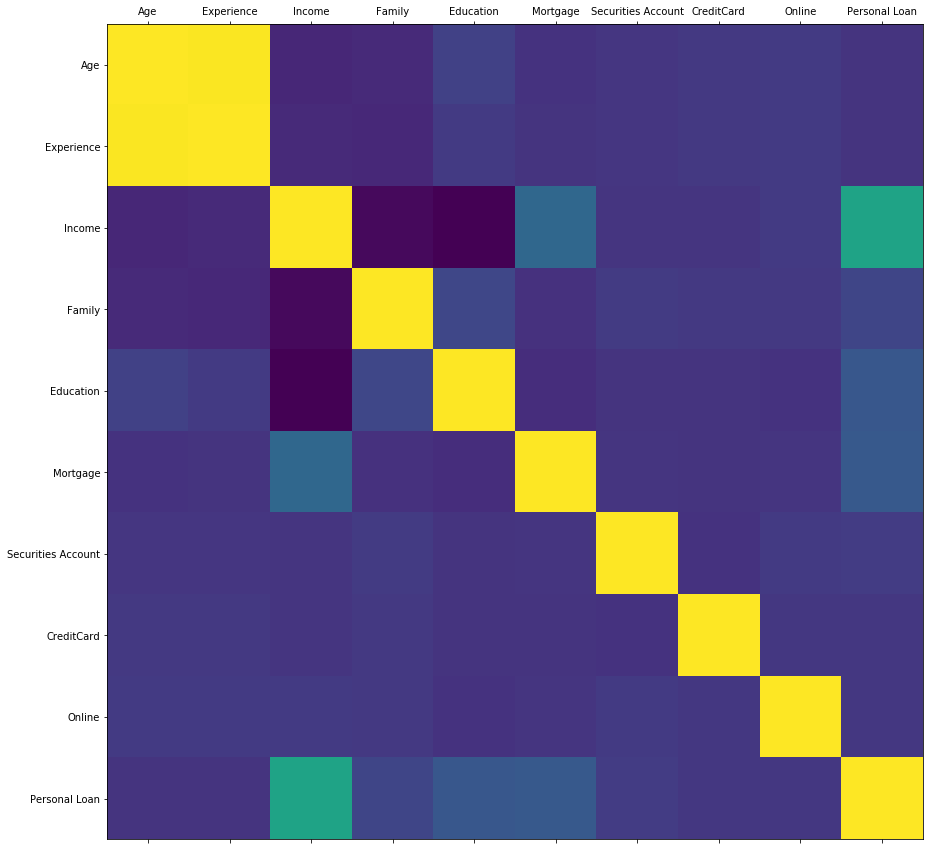

In [43]:
# 2b Plot correlation between the variables
plot_corr(pl2)

## 2b Inference
- Age and Experience has a very hig correlation which is quite logical as more the age more would be the experience
- Income is the variable with highest level of correlation with Personal loan
- Not much of significant linear correlation found between any other variables

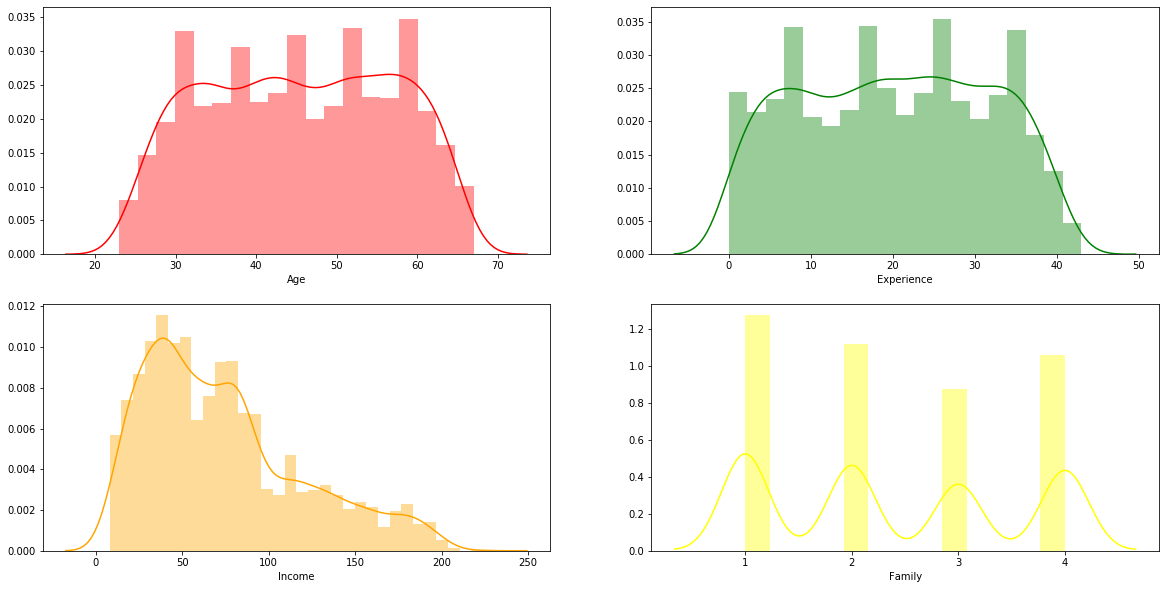

In [44]:
# 3 distribution of the data
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(pl2["Age"], color="red")
plt.subplot(222)
sns.distplot(pl2["Experience"], color="green")
plt.subplot(223)
sns.distplot(pl2["Income"], color="orange")
plt.subplot(224)
sns.distplot(pl2["Family"], color = "yellow")

## 3a Insights
- Age and experience is multimodal normal in nature with 5 peaks for age and 4 peaks for Experience
- Income follows a normal distribution with right skewed due to high Income of few of the individuals


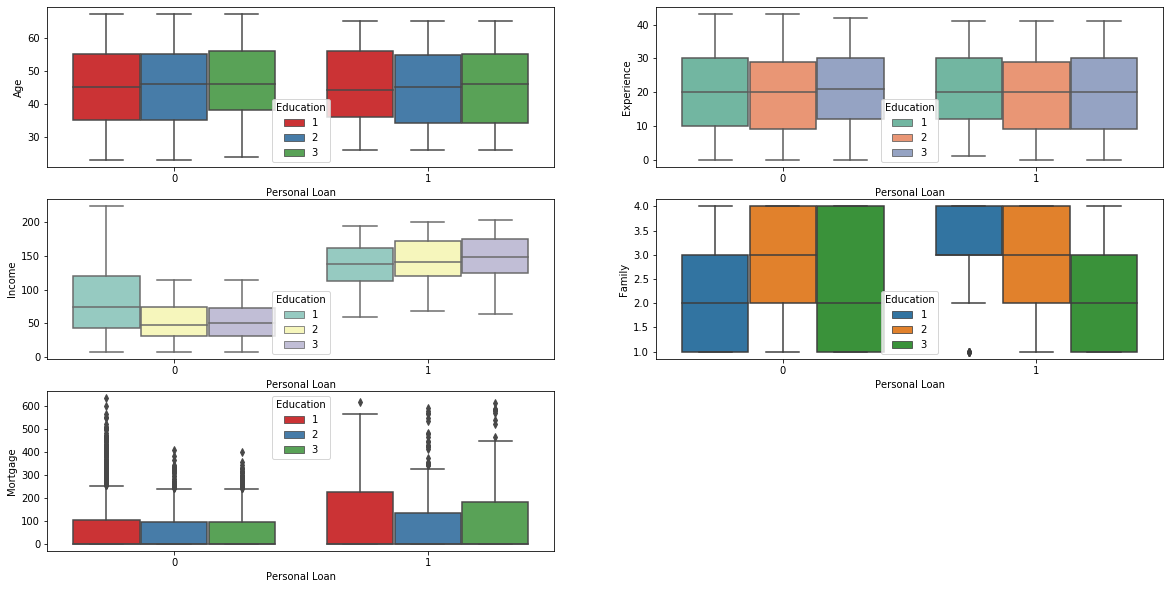

In [45]:
# 3b 5 point summary of numerical data
plt.figure(figsize=(20,10))
plt.subplot(321)
sns.boxplot(x="Personal Loan", y="Age", hue="Education",palette="Set1", data=pl2)
plt.subplot(322)
sns.boxplot(x="Personal Loan", y="Experience", hue="Education", palette="Set2", data=pl2)
plt.subplot(323)
sns.boxplot(x="Personal Loan", y="Income", hue="Education", palette="Set3", data=pl2)
plt.subplot(324)
sns.boxplot(x="Personal Loan", y="Family", hue="Education", data=pl2)
plt.subplot(325)
sns.boxplot(x="Personal Loan", y="Mortgage", hue="Education",palette="Set1", data=pl2)


## 3b Insights
- Income of customers who take personal loan offer are significantly higher compared to the one that dont go for a personal. It can be true the other way too that only customers with higher income are prefered to offer the loans
- Significantly mortgages are high for the customers who go for the personal loan
- Under graduates with more kids (children) are more prone to take personal loans which is understable due to high commitments
- No significant finding in terms age and experience relationship with Personal loans

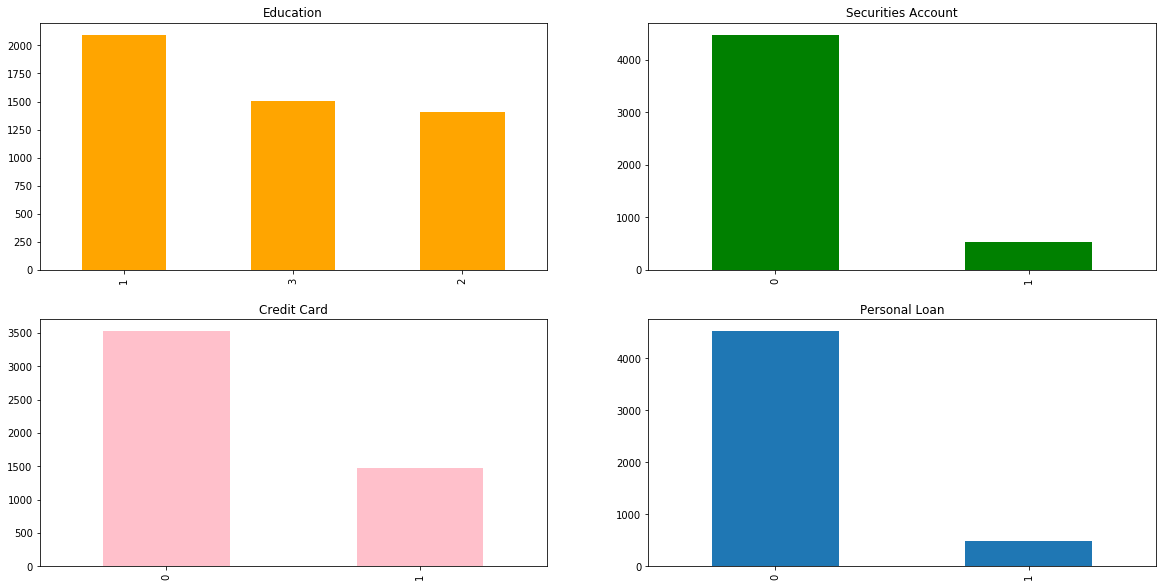

In [46]:
#3c Distribution of Categorical columns
plt.figure(figsize=(20,10))
plt.subplot(221)
ax5=pl2['Education'].value_counts().plot(kind='bar', color="orange")
ax5.title.set_text('Education')
plt.subplot(222)
ax6=pl2['Securities Account'].value_counts().plot(kind='bar',color="green")
ax6.title.set_text('Securities Account')
plt.subplot(223)
ax7=pl2['CreditCard'].value_counts().plot(kind='bar',color="pink")
ax7.title.set_text('Credit Card')
plt.subplot(224)
ax8=pl2['Personal Loan'].value_counts().plot(kind='bar')
ax8.title.set_text('Personal Loan')

## 3c Insights
- Over 40% of the customer group is under graduate
- only 1/3rd of the customer group hold a credit card

## 4. Split Data into training ang test

In [47]:
# Spliting the data into training and test set in ratio of 70:30
X = pl2.drop('Personal Loan',axis=1)     # Predictor feature columns (8 X m)
Y = pl2['Personal Loan']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Experience,Income,Family,Education,Mortgage,Securities Account,CreditCard,Online
1334,47,22,35,2,1,0,0,0,1
4768,38,14,39,1,2,0,0,0,1
65,59,35,131,1,1,0,0,1,1
177,29,3,65,4,2,244,0,0,0
4489,39,13,21,3,2,0,0,0,1


In [48]:
# checking the data split
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pl2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pl2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [49]:
# checking how the data mix is in both training and test split
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(pl2.loc[pl2['Personal Loan'] == 1]), (len(pl2.loc[pl2['Personal Loan'] == 1])/len(pl2.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(pl2.loc[pl2['Personal Loan'] == 0]), (len(pl2.loc[pl2['Personal Loan'] == 0])/len(pl2.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal Loan False Values       : 1351 (90.07%)



## 4 Insights
- Data has been split in 70:30 ratio
- The data mix in terms of people opt for personal loans and dont is 10:90 which remains unaffected both in training and test sets

# Step5: Classification using Logistic regression, KNN and Naive Bayes

## 5a Logistic Regression

In [50]:
# Step1: Defining the logistic regression model
regression_model = LogisticRegression(solver="liblinear")
regression_model.fit(x_train, y_train)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is -0.4040623015714127
The coefficient for Experience is 0.4044151040205363
The coefficient for Income is 0.05429191120406221
The coefficient for Family is 0.6534897128312829
The coefficient for Education is 1.6200092153209273
The coefficient for Mortgage is 0.0007132460761838014
The coefficient for Securities Account is 0.3912772667652958
The coefficient for CreditCard is -0.11297862098506198
The coefficient for Online is -0.09688010737679154


In [51]:
# Step2: Calculating the intercept of the model
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2.7718249643363055


In [52]:
# Step3: Predicting the y values in the test data set and calculating the Rsq score in both
y_predict = regression_model.predict(x_test)
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.9431428571428572
0.9413333333333334


## 5a Logistic Regression Insights
- The logistic regression has a good Rsq (model score) of over 94% in both Training and Test set

## 5b K Nearest Neighbour

In [53]:
# Step1: Defining the KNN model
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [54]:
# Step 2: Predicting the model score in testing data and training data
y_knnpredict = NNH.predict(x_test)
print(NNH.score(x_train, y_train))
print(NNH.score(x_test, y_test))

1.0
0.91


## 5b K Nearest Neighbour Insights
- The KNN algorithm with a K value of 5 has an excellent training model score of of 100% and a reasonalbly good test score of 91% 

## 5c Gaussian Naive Bayes classification

In [55]:
# Step1: Training the Gaussian naive bayes model in training data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [56]:
# Step2: Predicting the y values using the trained model and evaluating the model accuracy score
y_nbpredict = nb_model.predict(x_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_nbpredict)))
print()

Model Accuracy: 0.9167



## 5c Gaussian Naive Bayes Insights
- Gaussian Naive Bayes has a model accuracy score of 91.67% which is slightly better than the score of KNN but less than the score of Logistic regression

## 6. Creating and comparing the Confusion matrix for all models


In [57]:
# K Nearest Neighbour - Confusion Matrix
cmknn=metrics.confusion_matrix(y_test, y_knnpredict, labels=[1, 0])
df_cmknn = pd.DataFrame(cmknn, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

In [58]:
# Logistic Regression - Confusion Matrix
cmlog=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cmlog = pd.DataFrame(cmlog, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

In [59]:
# Gaussian Naive Bayes  - Confusion Matrix 
cmnb=metrics.confusion_matrix(y_test, y_nbpredict, labels=[1, 0])
df_cmnb = pd.DataFrame(cmnb, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])

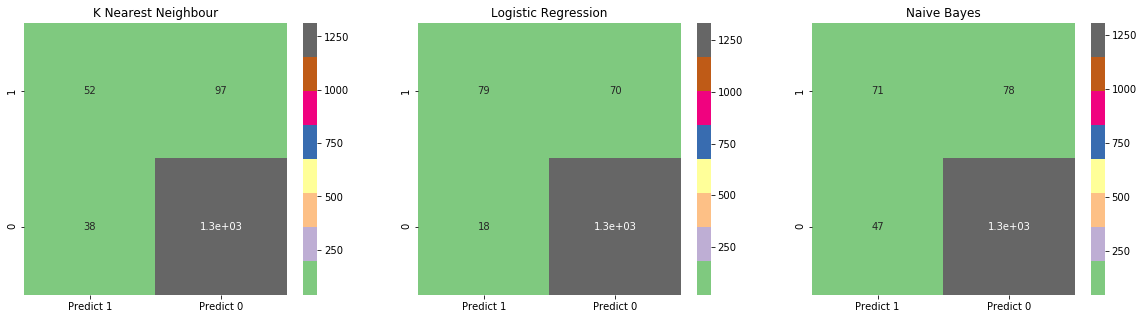

In [60]:
# Confusion matrix heat map - Logistic Regression, KNN and Gaussian Naive Bayes
plt.figure(figsize = (20,5))
plt.subplot(131)
ax1=sns.heatmap(df_cmknn, cmap="Accent", annot=True)
ax1.title.set_text('K Nearest Neighbour')
plt.subplot(132)
ax2=sns.heatmap(df_cmlog, cmap="Accent", annot=True)
ax2.title.set_text('Logistic Regression')
plt.subplot(133)
ax3=sns.heatmap(df_cmnb, cmap="Accent", annot=True)
ax3.title.set_text('Naive Bayes')

### Insights from Confusion Matrix
- It is very clear from the Confusion Matrix that Logistic Regression model has a better prediction both in tearms of identifying the True Postive (Customer who opt for Personal Loan) and True Negatives ( Customer who dont opt for Personal Loan)

Logistic Regression CM summary
- TP = 79
- TN = 1333
- FN = 70
- FP = 18

## 7. Model selection and Tuning the model for better prediction
- From the above insights we got by comparing the Confusion Matrix of Logistic Regression, KNN and Gaussian Naive Bayes Logistic regression is the clear winner with better prediction of all classes hence we will go with Logistic regression for further fine tuning

- Considering the goal of the exercise is to predict the Customers who would probably opt for a Personal Loan, it is important that we try to cover that class the most in order to plan our Personal Loan campaign.

- Inline with the above statement we will plot the roc curve from with the insights from it will tune down the threshold from a default threshold of 0.5. This will help cover most potential Personal loan customer at a cost of including more non prospect customers in the target campaign. This should be fine as the cost of loosing a prospect customer is more than the cost of targeting a non prospect customer

In [61]:
# predicting probability thorugh Logistic regression, K Nearest neighbour and Gaussian Naive Bayes
y_pred_logreg = regression_model.predict_proba(x_test)[:, 1]
y_pred_knn = NNH.predict_proba(x_test)[:, 1]
y_pred_nb = nb_model.predict_proba(x_test)[:, 1]

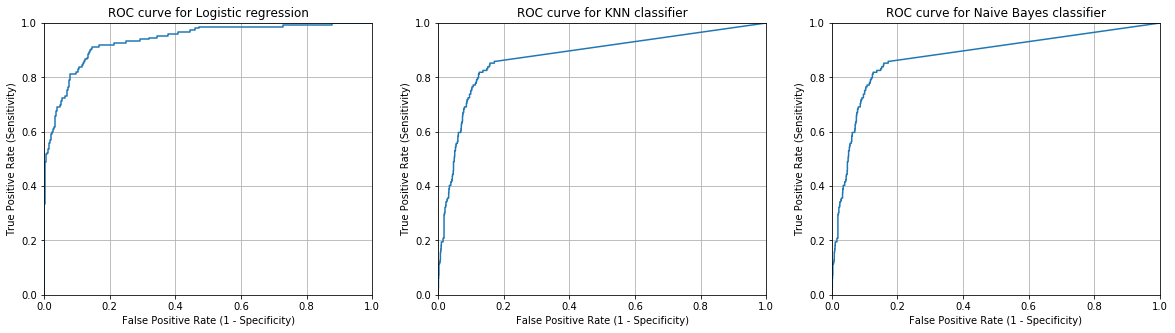

In [62]:
# Ploting the RoC curve for Logistic regression, K Nearest Neighbour and Gaussian Naive Bayes
plt.figure(figsize = (20,5))
plt.subplot(131)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_logreg)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.subplot(132)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for KNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.subplot(133)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Naive Bayes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Insights from ROC curve
- ROC curve of Logistic regression is clearly better than the KNN and Naive Bayes, the curve is much steeper than the other two meaning its better predicting positive witout much of false positives compared to KNN and Naives
- The ROC curve of Logistic regression shows it is able to predict over 50% of true positives without any False positive prediction. whereas the same for KNN and Naive Bayes are just over 10% as you can see the graphs starts to curve after the 0.1 TP rate for both KNN and Naive Bayes
- With this we can go ahead tuning down the threshold for logistic regression to bring in more True positives under the curve


### We will calculated Precision, Recall, Accuracy and RoC_AuC score for a default logistic regression threshold of 0.5. with the insights we got from RoC curve will tune the model further

In [63]:
# Calculating the default accuracy measures before tuning the model
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
clf = LogisticRegression()
clf.fit(x_train, y_train)
threshold = 0.5
preds = np.where(clf.predict_proba(x_test)[:,1] > threshold, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
                 index=["accuracy", "recall", "precision", "roc_auc_score"])


C:\Users\thiruvenkadam\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
accuracy,0.941333
recall,0.530201
precision,0.814433
roc_auc_score,0.758439


### Insights from model accuracy measures

- The recall is 53% meaning we still leave out half of the prospective customer who will opt for a Personal loan because of going with a default threshold of 0.5
- The Precision is 81.4% meaning out of 100 customers we predict as prospect 81 will go with our Personal Loan offering. We can sacrifice this score to cover our Personal Loan campaign to more Prospects by reducing the model cut_off threshold 

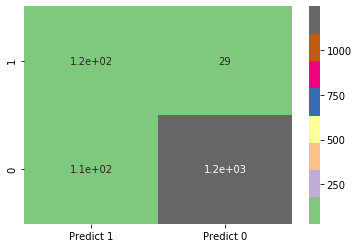

In [64]:
# Tuning the model with threshold of 0.15 and creating the confusion matrix for the same
from sklearn.preprocessing import binarize
y_pred_prob = regression_model.predict_proba(x_test)[:, 1]
y_predict_adj = binarize([y_pred_prob], 0.15)[0]
cmlog=metrics.confusion_matrix(y_test, y_predict_adj, labels=[1, 0])
df_cmlog = pd.DataFrame(cmlog, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
sns.heatmap(df_cmlog, cmap="Accent", annot=True)

In [65]:
threshold = 0.15
preds = np.where(clf.predict_proba(x_test)[:,1] > threshold, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
                 index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.910000
recall,0.805369
precision,0.530973
roc_auc_score,0.863454


## Final Model
- The logistic regression model is tuned with a new threshold of 0.15 for predicting the prospective Personal Loan customers
- The Confusion Matrix shows improvement in predicting True Positive with some hit in terms of False Positives numbers which is ok as the cost of loosing a prospect is more than cost of reaching out to a non prospect customer
- This change in threshold dramatically increases the Recall value which is the measure that we are interested to improve in order cover as much prospects as possible
- This also improves the Roc_auc score from 75.8% to 86%
- The recall of 80% is achieved, meaning we will be able to predict correctly 80% of the Personal loan prospects 
- The Precision of 53% meaning around half of the customers whom we predicted as prospects will actually take Personal Loan with us